In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
PATH = 'nyc-rolling-sales.csv'
df = pd.read_csv(PATH)
# df.head()

## <center>Analyze the columns</center>

###### (0 - 5) -> 5 being very important
###### (4)   # BOROUGH - figure out how to match them
###### (1)         # NEIGHBORHOOD - not so important but can be kept
###### (2)       # BUILDING CLASS CATEGORY - can be important but building class already gives the info
###### (3)     # TAX CLASS AT PRESENT - tells us how much tax the owners pay
###### (0)           # BLOCK - unimportant
###### (0)           # LOT - unimportant
###### (0)           # EASE-MENT - very unimportant
###### (3)     # BUILDING CLASS AT PRESENT - teaches us the building class 
######  -------  https://www.propertyshark.com/mason/text/nyc_building_class.html -------
###### (1)         # ADDRESS - not so important
###### (0)           # APARTMENT NUMBER - not so important
###### (3)     # ZIP CODE - zip code
###### (2)       # RESIDENTIAL UNITS - self explanatory
###### (2)       # COMMERCIAL UNITS - just as self exp as last
###### (2)       # TOTAL UNITS - yup
###### (4)   # LAND SQUARE FEET - could be cool to work with (turn them into ints) (useable space)
###### (4)   # GROSS SQUARE FEET - square footage with second floors, etc (all space (use this metric))
###### (3)     # YEAR BUILT - could be cool to work with (already ints) 
###### (3)     # TAX CLASS AT TIME OF SALE - (ints) -- 1 - 20.919%, 2 - 12.612%, 3 - 12.093%, 4 - 10.514%
###### (3)     # BUILDING CLASS AT TIME OF SALE - like before but it changed
###### (5) # SALE PRICE - important (change to int)
###### (4)   # SALE DATE - important -- # years = [int(n[0:4]) for n in df['SALE DATE'] ]

In [27]:
from collections import Counter

# replace the value of col to see the unique values that appear in that column
col = 'TAX CLASS AT PRESENT'
show = sorted(df[col].dropna().unique())

# show

# Clean up the data

#### 1) Convert to ints:
 - LAND SQUARE FEET
 - GROSS SQUARE FEET
 - SALE PRICE

#### 2) Get rid of (drop):
 - BLOCK
 - LOT
 - EASE-MENT
 - APARTMENT NUMBER
 - NEIGHBORHOOD
 - ADDRESS

#### 3) Add columns:
 - year sold
 - month sold
 - month and year
 - price per sqft


*NOTE : If a any value is null or a string we can set it's int value to -1

In [28]:
# DONT TOUCH THIS CELL

df['SALE PRICE'] = [int(price) if price.isdigit() else -1 for price in df['SALE PRICE']]
df['LAND SQUARE FEET'] = [int(size) if size.isdigit() else -1 for size in df['LAND SQUARE FEET']]
df['GROSS SQUARE FEET'] = [int(size) if size.isdigit() else -1 for size in df['GROSS SQUARE FEET']]

In [29]:
# DROP CELL
# DONT TOUCH THIS CELL

df = df.drop(['Unnamed: 0', 'NEIGHBORHOOD', 'ADDRESS', 'BLOCK', 'LOT', 'EASE-MENT', 'APARTMENT NUMBER'], axis=1)

In [30]:
months = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['YEAR SOLD'] = [int(n[0:4]) for n in df['SALE DATE']]
df['MONTH SOLD'] = [int(n[5:7]) for n in df['SALE DATE']]
df['MONTH AND YEAR'] = [months[month - 1] + ' ' + str(year - 2000) for month, year in zip(df['MONTH SOLD'], df['YEAR SOLD'])]

df['PRICE / SQFT'] = [price / sqft if price > -1 and sqft > 0 else -1 for price, sqft in zip(df['SALE PRICE'] , df['GROSS SQUARE FEET'])]
sorted(df['MONTH SOLD'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

##### 84548 - total df length
##### 47717 - -1 p/sf
##### 7497 - 0 p/sf
##### 55214 - invalid p/sf
##### 65.3 % of the p/sf data is useless

## Lets look at the data

Text(0.5, 1.0, 'Number of properties sold by year')

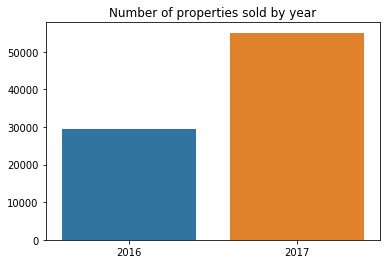

In [31]:
# plt.hist(df['YEAR SOLD'], bins=2, color='c')
counts_per_year = [sum(df['YEAR SOLD'] == 2016), sum(df['YEAR SOLD'] == 2017)]
sns.barplot([2016, 2017], counts_per_year).set_title('Number of properties sold by year')

Text(0.5, 1.0, 'Number of houses sold by month')

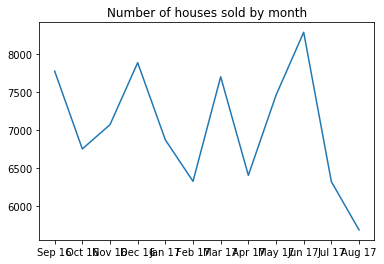

In [32]:
# Properties sold per month
months = ['Jan 16', 'Feb 16', 'Mar 16', 'Apr 16','May 16', 'Jun 16', 'Jul 16', 'Aug 16', 'Sep 16', 'Oct 16', 'Nov 16', 'Dec 16', 'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17','May 17', 'Jun 17', 'Jul 17', 'Aug 17', 'Sep 17', 'Oct 17', 'Nov 17', 'Dec 17']

months_recorded = []
properties_sold_per_month = []

for month in months:
    x = sum(df['MONTH AND YEAR'] == month)
    if x > 0:
        properties_sold_per_month.append(x)
        months_recorded.append(month)

plt.plot(months_recorded, properties_sold_per_month)
plt.title('Number of houses sold by month')

In [33]:
df['SALE DATE'].min()[0:10], df['SALE DATE'].max()[0:10]

('2016-09-01', '2017-08-31')

### Lets compare time

(array([13194.,  7705.,  6402.,  7461.,  8293.,  6319.,  5681.,  7779.,
         6751., 14963.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

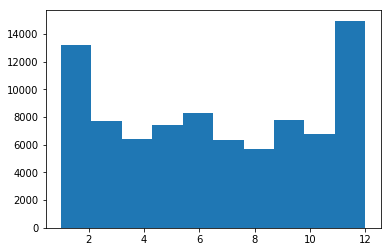

In [34]:
plt.hist(df['MONTH SOLD'])

In [35]:
months_in_order = ['Sep 16', 'Oct 16', 'Nov 16', 'Dec 16', 'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17']

### Lets take a look at tax classes
- Class 1 - 20.919%
- Class 2 - 12.612%
- Class 3 - 12.093%
- Class 4 - 10.514%

Text(0.5, 1.0, 'Num of properties sold by tax class')

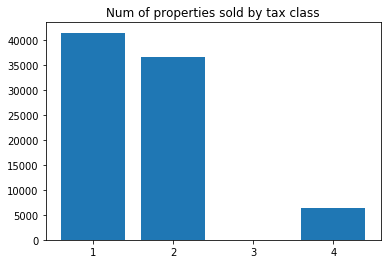

In [59]:
# plt.hist(df['TAX CLASS AT TIME OF SALE'], bins=4)
plt.bar(['1','2','3','4'], [sum(df['TAX CLASS AT TIME OF SALE'] == x) for x in range(1, 5)])
plt.title('Num of properties sold by tax class')

Text(0.5, 1.0, 'Num of properties bought by month and tax class')

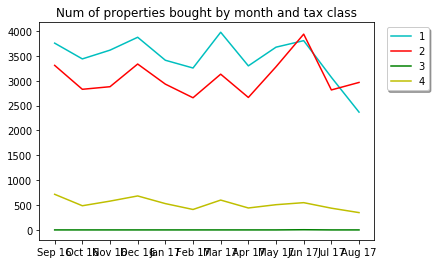

In [235]:
def hist_by_month(col, val, clr = 'c', df=df):
    col_df = df[df[col] == val]
    y = []
    for month in months_in_order:
        y.append(sum(col_df['MONTH AND YEAR'] == month))
    plt.plot(months_in_order, y, color=clr, label = val)
    
hist_by_month('TAX CLASS AT TIME OF SALE', 1, 'c')
hist_by_month('TAX CLASS AT TIME OF SALE', 2, 'r')
hist_by_month('TAX CLASS AT TIME OF SALE', 3, 'g')
hist_by_month('TAX CLASS AT TIME OF SALE', 4, 'y')

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.title('Num of properties bought by month and tax class')

#### Percentage of sales by property category (50)

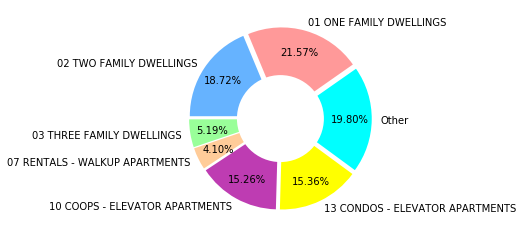

In [325]:
property_types = {'01 ONE FAMILY DWELLINGS': 18235,
 '02 TWO FAMILY DWELLINGS': 15828,
 '03 THREE FAMILY DWELLINGS': 4384,
 '07 RENTALS - WALKUP APARTMENTS': 3466,
 '10 COOPS - ELEVATOR APARTMENTS': 12902,
 '13 CONDOS - ELEVATOR APARTMENTS': 12989,
 'Other' : 16744}

labels = property_types.keys()
sizes = property_types.values()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2', '#ffff00', '#00ffff']
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%',startangle=35, pctdistance=0.75, explode = tuple([0.05] * 7))
centre_circle = plt.Circle((0,0),0.50,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)

#### If we compared the top four

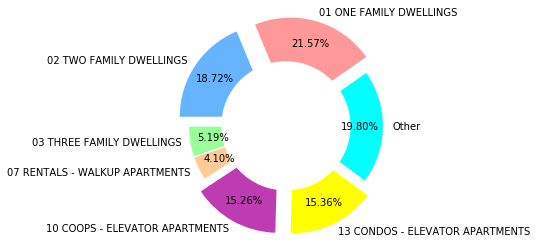

In [192]:
property_types = {'01 ONE FAMILY DWELLINGS': 18235,
 '02 TWO FAMILY DWELLINGS': 15828,
 '03 THREE FAMILY DWELLINGS': 4384,
 '07 RENTALS - WALKUP APARTMENTS': 3466,
 '10 COOPS - ELEVATOR APARTMENTS': 12902,
 '13 CONDOS - ELEVATOR APARTMENTS': 12989,
 'Other' : 16744}

labels = property_types.keys()
sizes = property_types.values()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2', '#ffff00', '#00ffff']
explode = (0.18, 0.18, 0.05, 0.05, 0.18, 0.18, 0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%',startangle=35, pctdistance=0.75, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()

#### They make up more than 70% of all sales

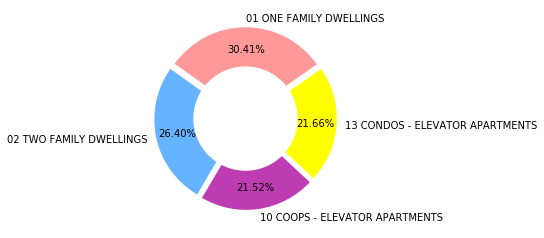

In [322]:
property_types = {'01 ONE FAMILY DWELLINGS': 18235,
 '02 TWO FAMILY DWELLINGS': 15828,
 '10 COOPS - ELEVATOR APARTMENTS': 12902,
 '13 CONDOS - ELEVATOR APARTMENTS': 12989}

labels = property_types.keys()
sizes = property_types.values()
colors = ['#ff9999','#66b3ff', '#be3cb2', '#ffff00']
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%',startangle=35, pctdistance=0.75, explode = (.05,.05,.05,.05))
centre_circle = plt.Circle((0,0),0.60,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)

In [332]:
property_types = {
    '01 ONE FAMILY DWELLINGS                    ': 18235,
    '02 TWO FAMILY DWELLINGS                    ': 15828,
    '10 COOPS - ELEVATOR APARTMENTS             ': 12902,
    '13 CONDOS - ELEVATOR APARTMENTS            ': 12989
}

df_pop_cats = pd.concat([df[df['BUILDING CLASS CATEGORY'] == prop_type] for prop_type in property_types.keys()])
df_pop_cats.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR SOLD,MONTH SOLD,MONTH AND YEAR,PRICE / SQFT
204,1,01 ONE FAMILY DWELLINGS,1,A9,10011,1,0,1,1360,2736,1910,1,A9,-1,2017-01-06 00:00:00,2017,1,Jan 17,-1.000000
205,1,01 ONE FAMILY DWELLINGS,1,A9,10011,1,0,1,1360,2736,1910,1,A9,-1,2016-10-20 00:00:00,2016,10,Oct 16,-1.000000
206,1,01 ONE FAMILY DWELLINGS,1,A9,10011,1,0,1,1975,3855,1901,1,A9,7425000,2016-12-30 00:00:00,2016,12,Dec 16,1926.070039
207,1,01 ONE FAMILY DWELLINGS,1,A4,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00,2017,1,Jan 17,0.001769
208,1,01 ONE FAMILY DWELLINGS,1,A4,10011,1,0,1,1588,5653,1900,1,A4,10,2017-01-30 00:00:00,2017,1,Jan 17,0.001769


Text(0.5, 1.0, 'Number of properties sold by month by category')

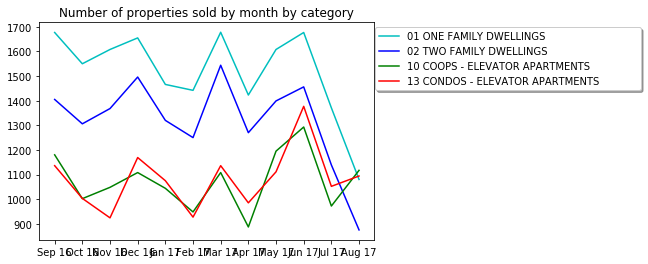

In [249]:
clrs = ['r', 'g', 'b', 'c']
for prop_type in property_types.keys():
    hist_by_month('BUILDING CLASS CATEGORY', prop_type, clrs.pop(), df_pop_cats)

plt.legend(loc='upper center', bbox_to_anchor=(1.4, 1), shadow=True, ncol=1)
plt.title('Number of properties sold by month by category')

## Back to pie charts but lets start to look at revenue

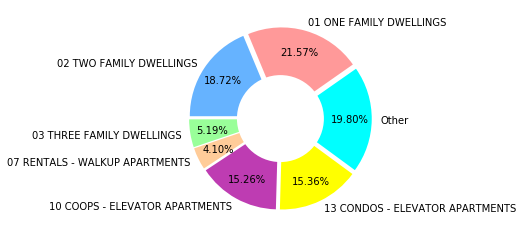

In [328]:
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%',startangle=35, pctdistance=0.75, explode = tuple([0.05] * 7))
centre_circle = plt.Circle((0,0),0.50,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)

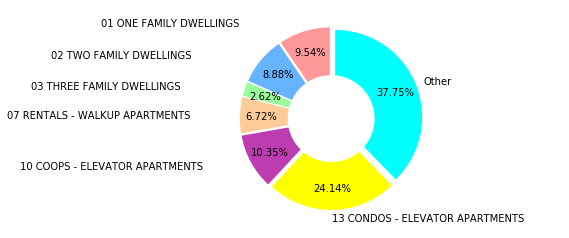

In [310]:
property_types = {'01 ONE FAMILY DWELLINGS                    ': 18235,
 '02 TWO FAMILY DWELLINGS                    ': 15828,
 '03 THREE FAMILY DWELLINGS                  ': 4384,
 '07 RENTALS - WALKUP APARTMENTS             ': 3466,
 '10 COOPS - ELEVATOR APARTMENTS             ': 12902,
 '13 CONDOS - ELEVATOR APARTMENTS            ': 12989,
 'Other' : 16744}

property_type_revenues = {}

for prop_type in property_types:
    property_type_revenues[prop_type] = sum([price for price in df[df['BUILDING CLASS CATEGORY'] == prop_type]['SALE PRICE'] if price > 0])
    if prop_type == 'Other':
        property_type_revenues[prop_type] = 33728395405
labels = property_type_revenues.keys()
sizes = property_type_revenues.values()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2', '#ffff00', '#00ffff']
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%',startangle=90, pctdistance=0.75, explode = tuple([0.05] * 7))
centre_circle = plt.Circle((0,0),0.50,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)

### Things to note
 - 13 Condos only account for 15% of sales, but have almost a quarter of revenue
 - 01 One family dwellings account for 21% of sales, but just under 10% of revenue
 - 02 Two family dwellings account for 19% of sales, but just under 9% of revenue
 - The Other category contains 20% of other buildings, but 38% of revenue

### More questions:
 - What is in the other category? 
 - Which catgory is sleeping on us?
 - We should explore!
 - Which category has the most expensive average sale price?

In [296]:
category_to_revenue = {}
for cat in df['BUILDING CLASS CATEGORY'].unique():
    category_to_revenue[cat] = sum([price for price in df[df['BUILDING CLASS CATEGORY'] == cat]['SALE PRICE'] if price > 0])
total = sum(category_to_revenue.values())
most_valuable_cats = {}
top_6 = [21566875136, 9242225068, 8804816666, 8520973104, 7932680456, 6002898584]
for key, val in category_to_revenue.items():
    if val in top_6:
        most_valuable_cats[key] = val
remaining = total - sum(most_valuable_cats.values()) # 27264891895
most_valuable_cats['Other'] = remaining

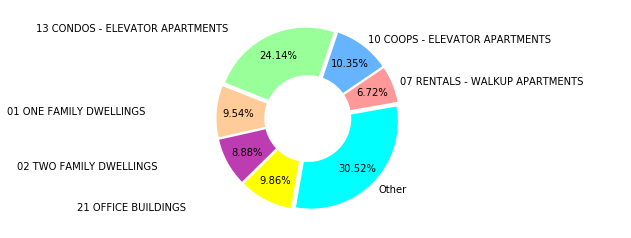

In [308]:
labels = most_valuable_cats.keys()
sizes = most_valuable_cats.values()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2', '#ffff00', '#00ffff']
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%',startangle=10, pctdistance=0.75, explode = tuple([0.05] * 7))
centre_circle = plt.Circle((0,0),0.50,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)

#### 21 Office buildings was hiding
- Took the place of 03 Three family dwellings

#### It isn't fair to use this graph because we're looking at total revenue
 - We should be looking at average

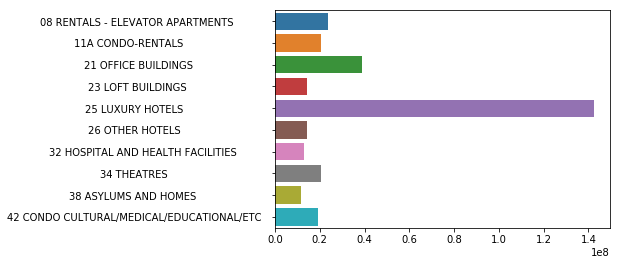

In [385]:
category_to_avg_revenue = {}
for cat in sorted(df['BUILDING CLASS CATEGORY'].unique()):
    category_to_avg_revenue[cat] = np.mean([price for price in df[df['BUILDING CLASS CATEGORY'] == cat]['SALE PRICE'] if price > 0])

most_valuable_avg_cats = {}
top_10 = [142377525.0, 38787738.616740085, 23496587.406698566, 20592350.0, 20362754.736842107, 19320643.4, 14326074.397959184, 14109376.272727273, 12830554.51724138, 11446130.625]
for key, val in category_to_avg_revenue.items():
    if val in top_10:
        most_valuable_avg_cats[key] = val
        
x = [x for x in most_valuable_avg_cats.keys()]
y = [y for y in most_valuable_avg_cats.values()]
sns.barplot(y, x)

### Luxury hotels clearly takes the cake here with an average sale price of \$142 million
- But there are only 12 luxury hotels on our list
- The most expensive one selling for \$212,500,000

In [395]:
df[df['BUILDING CLASS CATEGORY'] == '25 LUXURY HOTELS                           '].sort_values(by='SALE PRICE', ascending=False).head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR SOLD,MONTH SOLD,MONTH AND YEAR,PRICE / SQFT
2067,1,25 LUXURY HOTELS,4,H1,10001,529,9,538,19011,473391,1929,4,H1,212500000,2016-12-20 00:00:00,2016,12,Dec 16,448.888973
2565,1,25 LUXURY HOTELS,4,H2,10006,0,318,318,6109,130054,2014,4,H2,203345000,2016-12-22 00:00:00,2016,12,Dec 16,1563.542836
950,1,25 LUXURY HOTELS,4,H1,10001,0,1,1,9826,122236,2010,4,H1,139725000,2016-12-05 00:00:00,2016,12,Dec 16,1143.075690
2068,1,25 LUXURY HOTELS,4,H2,10001,0,1,1,7406,122859,2008,4,H2,139657500,2016-12-05 00:00:00,2016,12,Dec 16,1136.729910
2066,1,25 LUXURY HOTELS,4,H2,10018,0,1,1,7406,177000,2010,4,H2,128177800,2016-09-29 00:00:00,2016,9,Sep 16,724.168362


### Looking at all these graphs won't bring us to any conclusions
 - We need to run tests, many tests to find out which market is the best.
 - This is where we can begin using statistics
 - for each of these categories we need to create a normal distribution of thier sales prices
 - we also need to make a normal distribution of all the categories to give us the odds of picking one
### Once we create these normal distributions we can find:
   - the highest pick rate
   - the highest value on average
   - then we can compare to see which is best for real estate.

In [557]:
def create_normal_distribution_no_avgs(data):
    normal_distribution = []
    for _ in range(100):
        # chose 30 random points without replacement
        picks = np.random.choice(a = data, replace=False, size = 30)
        # add the mean of those points to our distribution
        normal_distribution.append(Counter(picks).most_common()[0][0])
    return normal_distribution

In [445]:
## DONT RUN THIS CELL
norm_dist_hist = Counter(create_normal_distribution_no_avgs(df['BUILDING CLASS CATEGORY']))

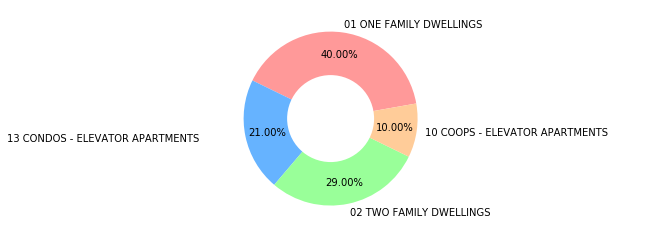

In [446]:
labels = norm_dist_hist.keys()
sizes = norm_dist_hist.values()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2', '#ffff00', '#00ffff']
plt.pie(sizes,colors=colors, labels=labels, autopct='%1.2f%%',startangle=10, pctdistance=0.75)
centre_circle = plt.Circle((0,0),0.50,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)

#### That's a normal distribution
    

In [494]:
def find_remove_outliers_iqr(data_sample):
    if len(data_sample) < 2:
        return data_sample
    '''calculate interquartile range'''
    q1, q3 = np.percentile(data_sample, 25) , np.percentile(data_sample, 75)
    iqr = q3 - q1
    # scipy.stats.iqr(data_sample)
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    data_without_outliers = [data for data in data_sample if data > lower and data < upper]
    return data_without_outliers

def create_normal_distribution(bdata):
    if len(bdata) < 2:
        return bdata
    data = find_remove_outliers_iqr(bdata)
    normal_distribution = []
    for _ in range(1000):
        # chose 30 random points without replacement
        size = 30 if len(data) > 30 else len(data) // 2
        picks = np.random.choice(a = data, replace=False, size = size)
        # add the mean of those points to our distribution
        normal_distribution.append(np.mean(picks))
    return normal_distribution

In [495]:
def plot_circle(histogram):
    labels = histogram.keys()
    sizes = histogram.values()
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2', '#ffff00', '#00ffff']
    plt.pie(sizes,colors=colors, labels=labels, autopct='%1.2f%%',startangle=10, pctdistance=0.75)
    centre_circle = plt.Circle((0,0),0.50,fc='#ffffff')
    plt.gcf().gca().add_artist(centre_circle)

In [519]:
top = ['01 ONE FAMILY DWELLINGS                    ',
 '02 TWO FAMILY DWELLINGS                    ',
 '03 THREE FAMILY DWELLINGS                  ',
 '07 RENTALS - WALKUP APARTMENTS             ',
 '10 COOPS - ELEVATOR APARTMENTS             ',
 '13 CONDOS - ELEVATOR APARTMENTS            ',
 '21 OFFICE BUILDINGS                        ',]

Text(0.5, 1.0, 'Normal Distributions for building categories')

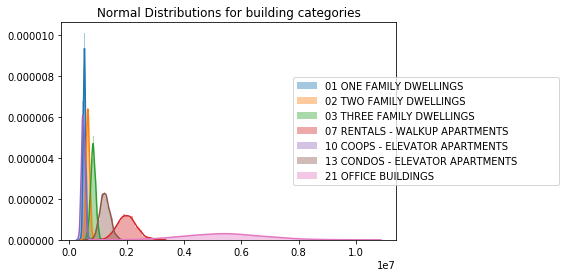

In [518]:
for cat in top:
    a = create_normal_distribution([price for price in df[df['BUILDING CLASS CATEGORY'] == cat]['SALE PRICE'].dropna() if price > 0])
    plot = sns.distplot(a, label=cat)
plot.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
plot.set_title('Normal Distributions for building categories')

655106.7197662797

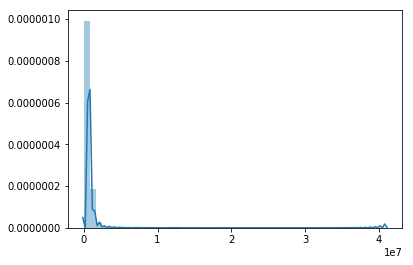

In [549]:
sns.distplot([price for price in df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS                    ']['SALE PRICE'].dropna() if price > 0])
np.mean([price for price in df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS                    ']['SALE PRICE'].dropna() if price > 0])

526855.142158461

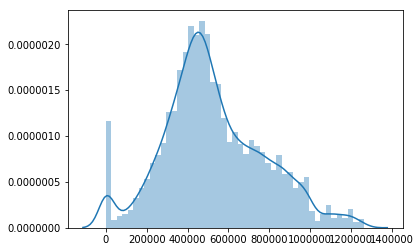

In [552]:
sns.distplot(find_remove_outliers_iqr([price for price in df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS                    ']['SALE PRICE'].dropna() if price > 0]))
np.mean(find_remove_outliers_iqr([price for price in df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS                    ']['SALE PRICE'].dropna() if price > 0]))

526549.0

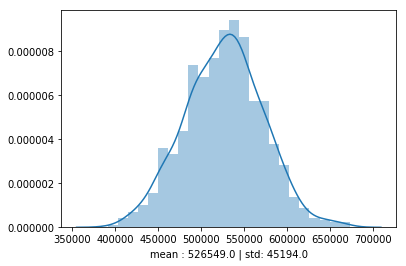

In [553]:
a = create_normal_distribution([price for price in df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS                    ']['SALE PRICE'].dropna() if price > 0])
mean = np.mean(a) // 1
std = np.std(a) // 1
nd = sns.distplot(a, axlabel= f'mean : {mean} | std: {std}')
mean

# Find the average home price by zipcode

In [36]:
def find_average_home_price_by_zipcode(zipcode):
    sale_prices = df[df['ZIP CODE'] == zipcode]['SALE PRICE'].dropna()
    sale_prices = [price for price in sale_prices if price > 10]
    return np.mean(sale_prices)

In [554]:
find_average_home_price_by_zipcode(10018)

11346411.384615384

In [556]:
jej = df[df['ZIP CODE'] == 10018]
leg = jej[jej['BUILDING CLASS CATEGORY']]
leg.sort_values(by= "SALE PRICE", ascending = False)
leg.head(8)

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR SOLD,MONTH SOLD,MONTH AND YEAR,PRICE / SQFT


In [558]:
REL_DIR_PATH = "figures/"

for index, feature in enumerate(housing_types):
    """
    YOUR IMAGE GENERATION CODE GOES HERE.
    """
    plt.title(feature)
    plt.savefig(REL_DIR_PATH + "_{}".format(index))

Signature: plt.savefig(*args, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None, metadata=None)

The output formats available depend on the backend being used.

Parameters
----------

fname : str or file-like object
    A string containing a path to a filename, or a Python
    file-like object, or possibly some backend-dependent object
    such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is *None* and *fname* is a string, the output
    format is deduced from the extension of the filename. If
    the filename has no extension, :rc:`savefig.format` is used.

    If *fname* is not a string, remember to specify *format* to
    ensure that the correct backend is used.

Other Parameters
----------------

dpi : [ *None* | scalar > 0 | 'figure' ]
 